In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path2data="/Users/luizaadelinaciucu/Work/TrackML/"
#df_hits=pd.read_csv(path2data+"event000021069-hits.csv")
eventNumber="000021069"

In [3]:
inputFileName=path2data+"/event"+eventNumber+"-hits.csv"
print("inputFileName",inputFileName)
df_hits_recon=pd.read_csv(inputFileName)

('inputFileName', '/Users/luizaadelinaciucu/Work/TrackML//event000021069-hits.csv')


In [4]:
inputFileName=path2data+"/event"+eventNumber+"-truth.csv"
print("inputFileName",inputFileName)
df_hits_truth=pd.read_csv(inputFileName)

('inputFileName', '/Users/luizaadelinaciucu/Work/TrackML//event000021069-truth.csv')


In [5]:
inputFileName=path2data+"/event"+eventNumber+"-particles.csv"
print("inputFileName",inputFileName)
df_particles=pd.read_csv(inputFileName)

('inputFileName', '/Users/luizaadelinaciucu/Work/TrackML//event000021069-particles.csv')


In [6]:
df_hits_recon.shape

(95224, 7)

In [7]:
df_hits_recon.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-96.0251,-11.043100,-1502.5,7,2,1
1,2,-57.1466,-5.425400,-1502.5,7,2,1
2,3,-83.1498,-9.277450,-1502.5,7,2,1
3,4,-70.7627,-11.261700,-1502.5,7,2,1
4,5,-73.3473,0.070458,-1502.5,7,2,1


In [8]:
df_hits_truth.shape

(95224, 9)

In [9]:
df_hits_truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,2,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,3,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,4,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,5,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026


In [10]:
#from annoy import AnnoyIndex
#import random

In [11]:
#df_hits.head()


In [12]:
df_particles.shape

(9003, 10)

In [13]:
#df_truth.head()

In [14]:
#df_particles.tail()

In [15]:
del df_hits_truth['hit_id']

In [16]:
#df_hits.shape

In [17]:
df_hits_truth.shape

(95224, 8)

In [18]:
df_hits_truth.head()

,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026


In [19]:
#df_truth.shape

In [20]:
#df_particles.shape

In [21]:
df_hits = pd.concat([df_hits_recon, df_hits_truth], axis=1, sort=False)

In [22]:
#df=pd.concat([df_hits,df_truth],axis=1)

In [23]:
df_hits.shape

(95224, 15)

In [24]:
#df.head()



In [25]:
df_hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,-96.0251,-11.043100,-1502.5,7,2,1,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,2,-57.1466,-5.425400,-1502.5,7,2,1,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,3,-83.1498,-9.277450,-1502.5,7,2,1,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,4,-70.7627,-11.261700,-1502.5,7,2,1,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,5,-73.3473,0.070458,-1502.5,7,2,1,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026


In [26]:
#def buildAnnoyIndex(data,metric="angular",ntrees=10):
    #f = len(data[0])
    #t = AnnoyIndex(f,metric)  
    #for i,d in enumerate(data):
        #t.add_item(i, d)
    #t.build(ntrees) # 10 trees
    #return t



#data=df[["x","y","z"]].values

#index=buildAnnoyIndex(data,metric="angular",ntrees=10)


#NB_BUCKET=5
#for i in range(NB_BUCKET):
    #n=random.choice(range(len(data)))
    
    #bucket_idx=np.array(index.get_nns_by_item(n,50))
    #bucket=df.iloc[bucket_idx]
    #plt.plot(bucket.x,bucket.y,"o")
    #plt.plot(0,0,"r+")
#plt.show()

In [27]:
BUCKET_SIZE=20
BUCKET_START=0
df_bucket=df_hits[BUCKET_START:BUCKET_START+BUCKET_SIZE]

In [28]:
df_bucket.shape

(20, 15)

In [29]:
df_bucket.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,-96.0251,-11.043100,-1502.5,7,2,1,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,2,-57.1466,-5.425400,-1502.5,7,2,1,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,3,-83.1498,-9.277450,-1502.5,7,2,1,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,4,-70.7627,-11.261700,-1502.5,7,2,1,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,5,-73.3473,0.070458,-1502.5,7,2,1,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026


In [30]:
df_bucket

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,-96.0251,-11.043100,-1502.5,7,2,1,351284413067165696,-96.0272,-11.042000,-1502.5,-0.252020,-0.055783,-3.89135,0.000011
1,2,-57.1466,-5.425400,-1502.5,7,2,1,220692736976617472,-57.1428,-5.446980,-1502.5,0.208659,-0.000115,-5.17925,0.000010
2,3,-83.1498,-9.277450,-1502.5,7,2,1,193656433244372992,-83.1380,-9.292630,-1502.5,-0.341028,-0.012671,-5.99884,0.000010
3,4,-70.7627,-11.261700,-1502.5,7,2,1,693574683580170240,-70.7448,-11.274200,-1502.5,-0.548888,-0.067574,-11.59180,0.000012
4,5,-73.3473,0.070458,-1502.5,7,2,1,693560115051102208,-73.3581,0.071451,-1502.5,-1.455310,0.016571,-30.04180,0.000026
5,6,-83.4740,1.129180,-1502.5,7,2,1,616997065959931904,-83.4787,1.105010,-1502.5,-0.488937,-0.021615,-8.70473,0.000009
6,7,-58.1014,-5.149460,-1502.5,7,2,1,747602623384780800,-58.1202,-5.148580,-1502.5,-0.838924,-0.055120,-21.11950,0.000017
7,8,-59.7223,2.597250,-1502.5,7,2,1,333274824921055232,-59.7189,2.573510,-1502.5,-0.436118,-0.005628,-11.64620,0.000010
8,9,-83.0065,-14.131200,-1502.5,7,2,1,450366010051002368,-83.0082,-14.125400,-1502.5,-0.206439,-0.054707,-3.23858,0.000010
9,10,-66.6130,-10.935100,-1502.5,7,2,1,580973766499106816,-66.6009,-10.956200,-1502.5,-0.212149,-0.008676,-4.42666,0.000011


In [31]:
#for i in range(NB_BUCKET):
    #n=random.choice(range(len(data)))
    
    #bucket_idx=np.array(index.get_nns_by_item(n,20))
    #bucket=df.iloc[bucket_idx]
    #for k,v in bucket[["hit_id","x","y","z","particle_id"]].groupby("particle_id"):
        #print (v)
    #print ("-----")
    #print ("i")

In [32]:
df_bucket["particle_id"]

0     351284413067165696
1     220692736976617472
2     193656433244372992
3     693574683580170240
4     693560115051102208
5     616997065959931904
6     747602623384780800
7     333274824921055232
8     450366010051002368
9     580973766499106816
10    576475664429875200
11                     0
12     22553113789464576
13    774620304138829824
14    423341663507709952
15                     0
16    743104246437642240
17                     0
18    770117804023087104
19    743104246437642240
Name: particle_id, dtype: int64

In [33]:
#df

In [34]:
df_bucket["particle_id"]

0     351284413067165696
1     220692736976617472
2     193656433244372992
3     693574683580170240
4     693560115051102208
5     616997065959931904
6     747602623384780800
7     333274824921055232
8     450366010051002368
9     580973766499106816
10    576475664429875200
11                     0
12     22553113789464576
13    774620304138829824
14    423341663507709952
15                     0
16    743104246437642240
17                     0
18    770117804023087104
19    743104246437642240
Name: particle_id, dtype: int64

In [35]:
df_bucket.particle_id

0     351284413067165696
1     220692736976617472
2     193656433244372992
3     693574683580170240
4     693560115051102208
5     616997065959931904
6     747602623384780800
7     333274824921055232
8     450366010051002368
9     580973766499106816
10    576475664429875200
11                     0
12     22553113789464576
13    774620304138829824
14    423341663507709952
15                     0
16    743104246437642240
17                     0
18    770117804023087104
19    743104246437642240
Name: particle_id, dtype: int64

In [36]:
#tuple_most_common=list_tuple_most_common[0]
#tuple_most_common

In [37]:
df_bucket.particle_id.values

array([351284413067165696, 220692736976617472, 193656433244372992,
       693574683580170240, 693560115051102208, 616997065959931904,
       747602623384780800, 333274824921055232, 450366010051002368,
       580973766499106816, 576475664429875200,                  0,
        22553113789464576, 774620304138829824, 423341663507709952,
                        0, 743104246437642240,                  0,
       770117804023087104, 743104246437642240])

In [38]:
#particle_id_most_common=tuple_most_common[0]
#particle_id_most_common

In [39]:
#from collections import Counter
#print ( Counter(df.particle_id.values ) )

In [40]:
from collections import Counter

In [41]:
counter=Counter(df_bucket.particle_id.values)
counter

Counter({0: 3,
         22553113789464576: 1,
         193656433244372992: 1,
         220692736976617472: 1,
         333274824921055232: 1,
         351284413067165696: 1,
         423341663507709952: 1,
         450366010051002368: 1,
         576475664429875200: 1,
         580973766499106816: 1,
         616997065959931904: 1,
         693560115051102208: 1,
         693574683580170240: 1,
         743104246437642240: 2,
         747602623384780800: 1,
         770117804023087104: 1,
         774620304138829824: 1})

In [42]:
list_tuple_most_common=counter.most_common()
list_tuple_most_common

[(0, 3),
 (743104246437642240, 2),
 (351284413067165696, 1),
 (220692736976617472, 1),
 (747602623384780800, 1),
 (770117804023087104, 1),
 (693560115051102208, 1),
 (450366010051002368, 1),
 (580973766499106816, 1),
 (333274824921055232, 1),
 (693574683580170240, 1),
 (423341663507709952, 1),
 (576475664429875200, 1),
 (22553113789464576, 1),
 (774620304138829824, 1),
 (193656433244372992, 1),
 (616997065959931904, 1)]

In [43]:
tuple_most_common=list_tuple_most_common[0]
tuple_most_common

(0, 3)

In [44]:
particle_id_most_common=tuple_most_common[0]
particle_id_most_common

0

In [45]:
hit=df_bucket.iloc[7]
hit

hit_id         8.000000e+00
x             -5.972230e+01
y              2.597250e+00
z             -1.502500e+03
volume_id      7.000000e+00
layer_id       2.000000e+00
module_id      1.000000e+00
particle_id    3.332748e+17
tx            -5.971890e+01
ty             2.573510e+00
tz            -1.502500e+03
tpx           -4.361180e-01
tpy           -5.628240e-03
tpz           -1.164620e+01
weight         1.045220e-05
Name: 7, dtype: float64

In [46]:
hit_id=hit["hit_id"]
hit_id

8.0

In [47]:
particle_id=hit["particle_id"]
particle_id

3.332748249210552e+17

In [48]:
list_input=[]
list_output=[]

# loop over the hits in the bucket
for i in range(df_bucket.shape[0]):
    # we get all a dictionary of names of the columns to values for the i'th row as df_bucket.iloc[i]
    print "i",i,"hit_id",df_bucket.iloc[i]["hit_id"],"x",df_bucket.iloc[i]["x"],"y",df_bucket.iloc[i]["y"],"z",df_bucket.iloc[i]["z"],"particle_id",df_bucket.iloc[i]["particle_id"]
    # now fill the input list, but adding one at a time the values of x, y, z
    list_input.append(df_bucket.iloc[i]["x"])
    list_input.append(df_bucket.iloc[i]["y"])
    list_input.append(df_bucket.iloc[i]["z"])
    # now fill the output list 
    # check if our particle_id is the same as the most common one, if so, choose 1, if not choose 0
    if df_bucket.iloc[i]["particle_id"]==particle_id_most_common:
        output=1
    else:
        output=0
    # add the output to the list
    list_output.append(output)
# done for loop over all the hits in the bucket
# print out the list_input, filled with the x, y, z values
print "list_input",list_input
# let's make sure that it has three times number of elements like the bucket size
print "list_input has so many elements:",len(list_input)
# print out the list_output, filled with either 1 or 0
print "list_output",list_output
# let's make sure that it has the same number of elements like the bucket size
print "list_output has so many elements:",len(list_output)

i 0 hit_id 1.0 x -96.0251 y -11.0431 z -1502.5 particle_id 3.512844130671657e+17
i 1 hit_id 2.0 x -57.1466 y -5.4254 z -1502.5 particle_id 2.2069273697661747e+17
i 2 hit_id 3.0 x -83.1498 y -9.27745 z -1502.5 particle_id 1.93656433244373e+17
i 3 hit_id 4.0 x -70.7627 y -11.2617 z -1502.5 particle_id 6.935746835801702e+17
i 4 hit_id 5.0 x -73.3473 y 0.07045760000000001 z -1502.5 particle_id 6.935601150511022e+17
i 5 hit_id 6.0 x -83.47399999999999 y 1.1291799999999999 z -1502.5 particle_id 6.169970659599319e+17
i 6 hit_id 7.0 x -58.1014 y -5.1494599999999995 z -1502.5 particle_id 7.476026233847808e+17
i 7 hit_id 8.0 x -59.7223 y 2.59725 z -1502.5 particle_id 3.332748249210552e+17
i 8 hit_id 9.0 x -83.0065 y -14.1312 z -1502.5 particle_id 4.503660100510024e+17
i 9 hit_id 10.0 x -66.613 y -10.9351 z -1502.5 particle_id 5.809737664991068e+17
i 10 hit_id 11.0 x -78.6731 y -8.37343 z -1502.5 particle_id 5.764756644298752e+17
i 11 hit_id 12.0 x -31.0244 y -5.73315 z -1502.5 particle_id 0.0
i 

In [49]:
nparray_error_x=df_hits["x"]-df_hits["tx"]
nparray_error_x

0        0.0021
1       -0.0038
2       -0.0118
3       -0.0179
4        0.0108
5        0.0047
6        0.0188
7       -0.0034
8        0.0017
9       -0.0121
10       0.0152
11       0.0011
12       0.0118
13       0.0100
14       0.0040
15       0.0000
16      -0.0010
17      -0.0030
18      -0.0100
19      -0.0050
20       0.0010
21      -0.0040
22       0.0010
23      -0.0010
24       0.0080
25      -0.0100
26      -0.0070
27      -0.0020
28      -0.0070
29      -0.0030
          ...  
95194   -1.9610
95195    1.1550
95196    0.5170
95197   -4.5370
95198   -2.2630
95199   -0.5060
95200   -4.4300
95201    2.7440
95202    0.3430
95203   -0.0920
95204    1.2750
95205    4.2570
95206   -1.7660
95207   -3.4120
95208    0.9640
95209    0.5140
95210    0.2300
95211   -4.2920
95212    4.3120
95213   -1.3010
95214   -3.9190
95215    0.8680
95216    0.2860
95217   -2.0560
95218   -2.5960
95219    3.5810
95220   -3.8060
95221    3.3730
95222   -0.5920
95223   -2.5100
Length: 95224, dtype: fl

(array([  36.,   37.,   46.,   37.,   50.,   38.,   44.,   39.,   29.,
          41.,   44.,   33.,   49.,   47.,   31.,   51.,   55.,   52.,
          55.,   48.,   50.,   62.,   71.,   77.,   89.,   95.,   99.,
         111.,  156.,  160.,  199.,  220.,  204.,  316.,  315.,  387.,
         523.,  664.,  749., 1086., 1554., 1465., 1969., 2404., 2762.,
        4141., 4464., 4621., 5350., 5291., 8162., 5462., 4631., 4581.,
        4159., 2670., 2456., 2093., 1548., 1510., 1053.,  809.,  677.,
         493.,  385.,  353.,  310.,  197.,  192.,  180.,  168.,  151.,
         107.,   92.,  103.,   78.,   81.,   73.,   69.,   37.,   64.,
          64.,   39.,   59.,   42.,   28.,   53.,   39.,   40.,   41.,
          46.,   26.,   36.,   38.,   50.,   38.,   47.,   30.,   38.,
          35.]),
 array([-0.1  , -0.098, -0.096, -0.094, -0.092, -0.09 , -0.088, -0.086,
        -0.084, -0.082, -0.08 , -0.078, -0.076, -0.074, -0.072, -0.07 ,
        -0.068, -0.066, -0.064, -0.062, -0.06 , -0.058, -0

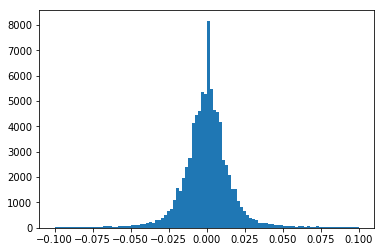

In [50]:
plt.hist(nparray_error_x, bins=100, range=(-0.1,0.1))

In [51]:
nparray_error_y=df_hits["y"]-df_hits["ty"]
nparray_error_y

0       -0.001100
1        0.021580
2        0.015180
3        0.012500
4       -0.000993
5        0.024170
6       -0.000880
7        0.023740
8       -0.005800
9        0.021100
10      -0.019810
11      -0.000520
12       0.002400
13       0.009580
14      -0.020270
15       0.000200
16      -0.021800
17       0.011900
18      -0.001935
19      -0.017800
20      -0.000300
21      -0.012000
22      -0.000300
23       0.000200
24      -0.006400
25      -0.003200
26       0.004600
27       0.000900
28       0.019800
29       0.007900
           ...   
95194    0.946000
95195   -0.538000
95196   -0.214000
95197    2.284000
95198    1.140000
95199    0.235000
95200    2.081000
95201   -1.325000
95202   -0.127000
95203    0.025000
95204   -0.477000
95205   -1.356000
95206    0.580000
95207    1.085000
95208   -0.187000
95209   -0.112000
95210   -0.006000
95211    0.825000
95212   -0.809000
95213    0.213000
95214    0.251000
95215   -0.068800
95216   -0.033000
95217    0.160040
95218    0

(array([  32.,   40.,   25.,   47.,   39.,   27.,   40.,   43.,   29.,
          43.,   48.,   39.,   49.,   53.,   49.,   54.,   67.,   54.,
          53.,   50.,   48.,   67.,   67.,   61.,   85.,   87.,   97.,
         140.,  159.,  151.,  198.,  236.,  217.,  319.,  339.,  370.,
         501.,  660.,  768., 1065., 1526., 1538., 1996., 2378., 2785.,
        4047., 4668., 4706., 5397., 5391., 7876., 5310., 4792., 4645.,
        4051., 2759., 2412., 2006., 1520., 1460., 1119.,  798.,  670.,
         480.,  361.,  340.,  307.,  226.,  251.,  199.,  159.,  143.,
         135.,   83.,  102.,   89.,   59.,   68.,   69.,   56.,   56.,
          42.,   46.,   48.,   47.,   40.,   38.,   29.,   42.,   58.,
          42.,   26.,   42.,   51.,   26.,   34.,   36.,   41.,   31.,
          33.]),
 array([-0.1  , -0.098, -0.096, -0.094, -0.092, -0.09 , -0.088, -0.086,
        -0.084, -0.082, -0.08 , -0.078, -0.076, -0.074, -0.072, -0.07 ,
        -0.068, -0.066, -0.064, -0.062, -0.06 , -0.058, -0

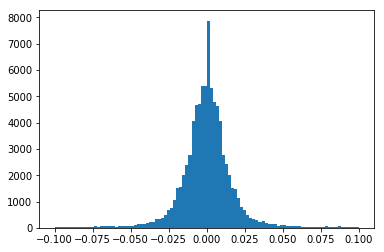

In [52]:
plt.hist(nparray_error_y, bins=100, range=(-0.1,0.1))

In [53]:
nparray_error_z=df_hits["z"]-df_hits["tz"]
nparray_error_z

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
95194    0.0
95195    0.0
95196    0.0
95197    0.0
95198    0.0
95199    0.0
95200    0.0
95201    0.0
95202    0.0
95203    0.0
95204    0.0
95205    0.0
95206    0.0
95207    0.0
95208    0.0
95209    0.0
95210    0.0
95211    0.0
95212    0.0
95213    0.0
95214    0.0
95215    0.0
95216    0.0
95217    0.0
95218    0.0
95219    0.0
95220    0.0
95221    0.0
95222    0.0
95223    0.0
Length: 95224, dtype: float64

(array([1.2300e+02, 1.1000e+01, 1.5000e+01, 2.1000e+01, 1.2600e+02,
        5.7000e+01, 2.2000e+01, 1.3000e+01, 1.8000e+01, 1.0900e+02,
        1.1200e+02, 2.2000e+01, 2.0000e+01, 2.7000e+01, 2.1000e+02,
        1.0300e+02, 3.5000e+01, 2.0000e+01, 3.9000e+01, 2.7500e+02,
        1.9100e+02, 5.0000e+01, 3.3000e+01, 4.1000e+01, 9.6000e+01,
        5.0800e+02, 5.0000e+01, 7.6000e+01, 7.0000e+01, 4.8400e+02,
        3.8300e+02, 8.7000e+01, 9.7000e+01, 1.1500e+02, 5.7300e+02,
        6.4100e+02, 1.5000e+02, 1.5500e+02, 1.3900e+02, 8.5100e+02,
        5.5800e+02, 1.3500e+02, 2.3000e+02, 1.8800e+02, 1.0040e+03,
        8.0200e+02, 1.9700e+02, 1.9000e+02, 2.3100e+02, 1.8900e+02,
        4.4596e+04, 2.3300e+02, 1.7300e+02, 2.0600e+02, 7.9900e+02,
        9.5100e+02, 1.6200e+02, 2.1200e+02, 1.3700e+02, 5.9000e+02,
        9.5900e+02, 1.7100e+02, 1.4000e+02, 1.4600e+02, 6.1800e+02,
        5.9300e+02, 9.5000e+01, 9.6000e+01, 8.7000e+01, 4.0000e+02,
        4.9700e+02, 6.0000e+01, 7.4000e+01, 5.20

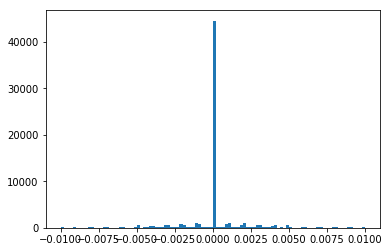

In [54]:
plt.hist(nparray_error_z, bins=100, range=(-0.01,0.01))

In [55]:
def get_list_inputValues(df_bucket,debug):
    list_inputValues=[]
    for i in range (df_bucket.shape[0]):
        hit=df_bucket.iloc[i]
        x=hit["x"]
        y=hit["y"]
        z=hit["z"]
        if debug:
            print "i", i, "x", x, "y", y, "z", z
        list_inputValues.append(x)
        list_inputValues.append(y)
        list_inputValues.append(z)
    return list_inputValues
        

In [56]:
# 95220
nrHits=df_hits.shape[0]
nrHits=42
debug=False
print "nrHits", nrHits
# keep only complete Buckets
nrBuckets=(nrHits-nrHits%BUCKET_SIZE)/BUCKET_SIZE
print "nrBuckets", nrBuckets
# keep even nr of Buckets for equal size train and test
nrBuckets=nrBuckets-nrBuckets%2
print "nrBuckets", nrBuckets
counterBuckets=0
for i in range (nrHits):
    isMultipleOfBucketSize=i%BUCKET_SIZE==0
    if isMultipleOfBucketSize==False:
        continue
    isCompleteBucket=i+BUCKET_SIZE<nrHits
    if isCompleteBucket==False:
        continue
    isNotLastOddBucket=counterBuckets<nrBuckets
    if isNotLastOddBucket==False:
        continue
    counterBuckets+=1
    print i, isMultipleOfBucketSize, counterBuckets
    df_bucket=df_hits[i:i+BUCKET_SIZE]
    #print "df_bucket", df_bucket
    list_inputValues=get_list_inputValues(df_bucket,debug)
    print "list_inputValues", list_inputValues
#doneforloop
print "counterBuckets", counterBuckets
    

nrHits 42
nrBuckets 2
nrBuckets 2
0 True 1
list_inputValues [-96.0251, -11.0431, -1502.5, -57.1466, -5.4254, -1502.5, -83.1498, -9.27745, -1502.5, -70.7627, -11.2617, -1502.5, -73.3473, 0.07045760000000001, -1502.5, -83.47399999999999, 1.1291799999999999, -1502.5, -58.1014, -5.1494599999999995, -1502.5, -59.7223, 2.59725, -1502.5, -83.0065, -14.1312, -1502.5, -66.613, -10.9351, -1502.5, -78.6731, -8.37343, -1502.5, -31.0244, -5.73315, -1502.5, -72.9722, -12.7396, -1502.5, -153.12, -5.20216, -1502.0, -175.399, -4.68051, -1502.0, -154.075, -10.0018, -1502.0, -108.992, -8.31748, -1502.0, -169.722, -10.7248, -1502.0, -107.939, 0.590619, -1502.0, -108.70200000000001, -8.32268, -1498.0]
20 True 2
list_inputValues [-152.855, -26.2446, -1498.0, -115.10799999999999, -21.0295, -1498.0, -173.122, -22.2564, -1498.0, -167.92700000000002, -30.8275, -1498.0, -155.446, -17.2664, -1498.0, -127.429, -24.3132, -1498.0, -139.06, -15.4351, -1498.0, -132.912, -23.3121, -1498.0, -151.666, -25.8767, -1498.0, 